# 1.1 Vectors

Vectors in Julia are represented by one-dimensional Array objects. A vector is constructed by giving the list of elements surrounded by square brackets, with the elmeents separated by commas or semicolons. The assignment operator = is used to give a name to the array. The ```length``` function returns the size (dimension).

In [1]:
x = [-1.1, 0.0, 3.9, -7.2]

4-element Vector{Float64}:
 -1.1
  0.0
  3.9
 -7.2

In [2]:
length(x)

4

In [3]:
y = [-1.1; 0.0; 3.6; -7.2] #Using semicolons

4-element Vector{Float64}:
 -1.1
  0.0
  3.6
 -7.2

In [4]:
length(y)

4

The ```Array{Float64,1}``` displayed by Julia above each array tells us that the array is one-dimensional and its entries are floating point numbers that use 64 bits.

**Some common mistakes.** Don't forget the commas or semicolons between entries, and be sure to use square brackets and not parentheses. Otherwise you'll get things that make sense in Julia, but are not vectors.

In [5]:
a = [ 1 2 ]
b = ( 1, 2 )

(1, 2)

Here ```a``` is a row vector, which we will encounter later; ```b``` is a tuple or list consisting of two scalars. 

**Indexing.**  A specific element $x_i$ is retrieved by the expression ```x[i]``` where ```i``` is the index (which runs to 1 to $n$, for an $n$-vector). Array indexing can also be used on the left-hand side of an assignment, to change the value of a specific element. 

In [6]:
x = [ -1.1, 0.0, 3.6, -7.2 ];
x[3]

3.6

In [7]:
x[3] = 4.0
x

4-element Vector{Float64}:
 -1.1
  0.0
  4.0
 -7.2

The special index ```end``` refers to the last index of a vector. In the example above, ```x[end]``` and ```x[length(x)]``` both give the last entry ```-7.2```.

**Assignment versus copying**. Matlab or Octave users may be surprised by the behavior of an assignment ```y = x``` if ```x``` is an array. This expression gives a new name (or reference) ```y``` to the *same* array already referenced by ```x```. It does not create a new copy of the array ```x```.

In [8]:
x = [ -1.1, 0.0, 3.6, -7.2 ];
y = x
x[3] = 4.0
y #The assignment to x[3] also changes y[3]

4-element Vector{Float64}:
 -1.1
  0.0
  4.0
 -7.2

In [9]:
y[1] = 2.0
x

4-element Vector{Float64}:
  2.0
  0.0
  4.0
 -7.2

To create a new copy of an array, the function ```copy``` should be used.

In [10]:
x = [ -1.1, 0.0, 3.6, -7.2 ];
y = copy(x)
x[3] = 4.0
y

4-element Vector{Float64}:
 -1.1
  0.0
  3.6
 -7.2

In [11]:
y[1] = 2.0
x

4-element Vector{Float64}:
 -1.1
  0.0
  4.0
 -7.2

**Vector equality.** Equality of vectors is checked using the relational operator ```==```. For two vectors (arrays) ```a``` and ```b```, the Julia expression ```a==b``` evaluates to ```true``` if the vectors (arrays) are equal, *i.e.*, they have the same length and identical entries, and ```false``` otherwise.

In [12]:
x = [ -1.1, 0.0, 3.6, -7.2 ];
y = copy(x)
y[3] = 4.0
y == x

false

In [13]:
z = x
z[3] = 4.0
z == x

true

**Scalars versus 1-vectors.** In the mathematical notation used in VMLS we consider a 1-vector to be the same as a number. But in Julia, 1-vectors are not the same as scalars (numbers). Julia distinguishes between the 1-vector (array) ```[ 1.3 ]``` and the number ```1.3```.

In [14]:
x = [1.3]

1-element Vector{Float64}:
 1.3

In [15]:
y = 1.3

1.3

In [16]:
x == y

false

In [17]:
x[1] == y

true

In the last line, ```x[1]``` is the first (and only) entry of ```x```, which is indeed the number ```1.3```.

**Block or stacked vectors.** To construct a block vector in Julia, you can use ```vcat``` (vertical concatenate) or the semicolon (;) operator. Let's construct the block vector $z = (x,y)$ with $x = (1,-2)$ and $y = (1,1,0)$ using the two methods.

In [18]:
x = [ 1,-2]; y = [1,1,0];
z = [x; y] # Concatenate using semicolon

5-element Vector{Int64}:
  1
 -2
  1
  1
  0

In [19]:
z = vcat(x,y)

5-element Vector{Int64}:
  1
 -2
  1
  1
  0

As in mathematical notation, you can stack vectors with scalars, *e.g.*, ```[1;x;0]``` create (1,x,0).

**Some common mistakes.** There are a few Julia operations that look similar but do not construct a block or stacked vector. For example, ```z = (x,y)``` creates a list or tuple of the two vectors; ```z = [x,y]``` creates an array of the two vectors. Both of these are valid Julia expressions, but neither of them is the stacked vector ```[x;y]```.

**Subvectors and slicing.** As in the mathematical notation used in VMLS, the Julia expression ```r:s``` denotes the idnex range $r, r + 1,...,s$. (It is assumed here that ```r``` and ```s``` are positive integers with ```r``` the smaller of the two.) In VMLS we use $x_{r:s}$ to denote the slice of the vector x from index r to s. In Julia you can extract a subvector or slice of a vector using an index range as the argument. You can also use index ranges to assign a slice of a vector.

In [20]:
x = [9,4,3,0,5]
y = x[2:4]

3-element Vector{Int64}:
 4
 3
 0

In [21]:
x[4:5] = [-2, -3]; #Re-assign the 4 and 5 entries of x
x

5-element Vector{Int64}:
  9
  4
  3
 -2
 -3

**Julia indexing into arrays.** Julia slicing and subjectoring is much more general than the mathematical notation we use in VMLS. For example, one can use a number range with a third argument, that gives the stride, which is the increment between successive indexes. For example, the index range ```1:2:5``` is the list of numbers ```1,3,5```. The expressiong ```x[1:2:5]``` extracts the 3-vector ```[9,3,5```, i.e., the first, third, and fifth entries of x defined above. You can also use an index range that runs backward. For any vector ```z```, the Julia expressiong ```z[end:-1:1]``` is the reversed vector, i.e., the vector with the same coefficients, but in opposite order. 

**Vector of first differences.** Let's use slicing to create the (n-1)-vector d defined by $d_i = x_{i+1} - x_i$ for $i = 1,...,n - 1$, where x is an n-vector. The vector d is called the vector of (first) differences of x.

In [22]:
x = [1,0,0,-2,2];
d = x[2:end] - x[1:end-1]

4-element Vector{Int64}:
 -1
  0
 -2
  4

**List of vectors.** An ordered list of n-vectors might be denoted in VMLS as $a_1,...,a_k$ or $a^{(1)},...,a^{(k)}$ or just as $a,b,c$. There are several ways to represent lists of vectors in Julia. If we give the elements of the list, separated by commas, and surrounded by square brackets, we form a one-dimensional array of vectors. If instead we use parentheses as delimiters, we obtain a tuple, or list. 

In [23]:
x = [1.0, 0]; y = [1.0,-1.0]; z = [0,1.0];
list = [x,y,z]

3-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [1.0, -1.0]
 [0.0, 1.0]

In [24]:
list[2] #Second element of list

2-element Vector{Float64}:
  1.0
 -1.0

In [25]:
list = (x,y,z)

([1.0, 0.0], [1.0, -1.0], [0.0, 1.0])

In [26]:
list[3]

2-element Vector{Float64}:
 0.0
 1.0

Note the difference between ```[x,y,z]``` (an array of arrays) and ```[x;y;z]``` (an array of numbers, obtained by concatenation). To extract the ith vector from the list of vectors, use ```list[i]```. To get the jth element or coefficient of the ith vector in the list, use ```list[i][j]```.

**Zero vectors**. In Julia a zero vector of dimension n is created using ```zeros(n)```.

In [27]:
zeros(3)

3-element Vector{Float64}:
 0.0
 0.0
 0.0

The expression ```zeros(length(a))``` creates a vector with the same size as the vector ```a```.

**Unit vectors**. There is no built-in Julia function for creating $e_i$, the ith unit vector of length n. THe following code creates $e_i$, with i = 2 and n = 4.

In [28]:
i = 2; n = 4;
ei = zeros(n); #Create a zero vector
ei[i] = 1; #Set ith entry to 1
ei

4-element Vector{Float64}:
 0.0
 1.0
 0.0
 0.0

Here's another way to create $e_i$ using concatenation, using a Julia inline function.

In [29]:
unit_vector(i,n) = [zeros(i-1); 1; zeros(n-i)]

unit_vector (generic function with 1 method)

In [30]:
unit_vector(2,4)

4-element Vector{Float64}:
 0.0
 1.0
 0.0
 0.0

**Ones vector.** In Julia, the ones vector of dimension n, denoted $\textbf1_n$ or just $\textbf1$ in VMLS, is created using ```ones(n)```.

In [31]:
ones(2)

2-element Vector{Float64}:
 1.0
 1.0

**Random vectors.** We do not use or refer to random vectors in VMLS, which does not assume a background in probability. However, it is sometimes useful to generate random vectors, for example to test an identity or some algorithm. In Julia, ```rand(n)``` generates a random vector of length n with entries that are between 0 and 1. Each time this function is called or evaluated, it gives a different vector. The variant ```randn(n)``` (with the extra 'n' for normal) gives an n-vector with entries that come from a normal (Gaussian) distribution. They can be positive or negative, with typical values on the order of one. Remember that every time you evaluate these functions, you get a different random vector. In particular, you will obtain different entries in the vectors below when you run the code.

In [32]:
rand(2)

2-element Vector{Float64}:
 0.5095231797625139
 0.9228219575125371

In [33]:
rand(2)

2-element Vector{Float64}:
 0.5276073822268361
 0.44667442344110675

**Plotting**. There are several external packages for creating plots in Julia. One such package is Plots.jl, which you must add (install) via Julia's package manager control system; see page ix. Assuming the Plots package has been installed, you import it into Julia for use, using the command ```using Plots```. (This can take some time.) After that you can access the Julia commands that create or manipulate plots. 

For example, we can plot the temperature time series in Figure 1.3 of VMLS using the code below; the last line saves the plot in a file ```temperature.pdf```. The result is shown in Figure 1.1.

In [34]:
using Plots #Only need to do this once per session

In [35]:
temps = [71, 71, 68, 69, 68, 69,68, 74, 77, 82, 85, 86, 88, 86, 85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69, 69, 67, 68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78, 73, 72, 70, 70, 68, 67];

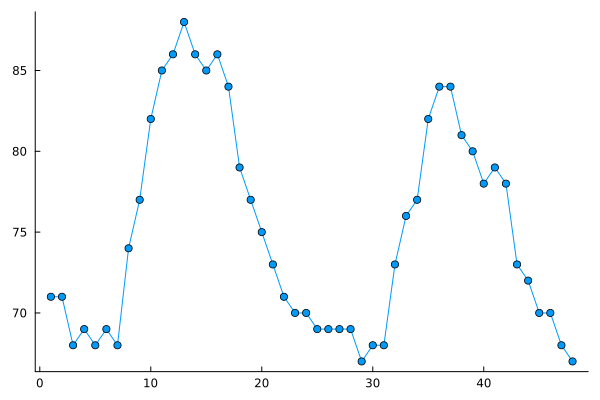

In [36]:
plot(temps, marker = :circle, legend = false, grid = false)
# savefig("temperature.pdf")

**Figure 1.1** Hourly temperature in downtown Los Angeles on August 5 and 6, 2015 (starting at 12:47AM, ending at 11:47PM).

# 1.2 Vector addition

**Vector addition and subtraction.** If ```x``` and ```y``` are vectors of the same size, ```x+y``` and ```x-y``` give their sum and difference, respectively.

In [37]:
[0, 7, 3] + [1, 2, 0] #Vector addition

3-element Vector{Int64}:
 1
 9
 3

In [38]:
[1,9] - [1,1] #Vector subtraction

2-element Vector{Int64}:
 0
 8

# 1.3 Scalar-vector multiplication

**Scalar-vector multiplication and division.** If ```a``` is a number and ```x``` a vector, you can express the scalar-vector product either as ```a*x``` or ```x*a```. (Julia actually allows you to write ```2.0x``` for ```2.0*x```. This is unambiguous because variable names cannot start with a number.) You can carry out scalar-vector division in a similar way, as ```x/a```, or the less familiar looking expression ```a\x```.

In [39]:
x = [0, 2, -1]
2.2*x, x*2.2 #Scalar-vector multiplication

([0.0, 4.4, -2.2], [0.0, 4.4, -2.2])

In [40]:
x/3, 3\x #Scalar-vector division

([0.0, 0.6666666666666666, -0.3333333333333333], [0.0, 0.6666666666666666, -0.3333333333333333])

**Scalar-vector addition.** In Julia you can add a scalar ```a``` and a vector ```x``` using ```x .+ a```. The dot that precedes the plus symbol tells Julia to apply the operation to each element. (More on this below.) The meaning is that the scalar is added or subtracted to each element. (This is not standard mathematical notation; in VMLS we denote this as, e.g., $x+a1$, where $x$ is an n-vector and $a$ is a scalar.) In Julia you can also carry out scalar-vector addition with the scalar on the left.

In [41]:
[1.1, -3.7, 0.3] .- 1.4 #Vector-scalar subtraction

3-element Vector{Float64}:
 -0.2999999999999998
 -5.1
 -1.0999999999999999

In [42]:
0.7 .+ [1, -1]

2-element Vector{Float64}:
  1.7
 -0.30000000000000004

**Elementwise operations.** Julia supports methods for carrying out an operation on every element or coefficient of a vector. To do this we add a period or dot before the operator. For example, if x and y are vectors of the same length, then ```x.*y, x./y, x.\y, x.^y``` are elementwise vector-vector operations. They result in vectors of the same length as x and y, and $i$th element $x_iy_, x_i/y_i, y_i/x_i$, and $x^y_i$, respectively.

As an example of elementwise division, let's find the 3-vector of asset returns ```r``` from the (vectors of) initial and final prices of assets (see page 22 in VMLS).

In [43]:
p_initial = [ 22.15, 89.32, 56.77 ];
p_final = [ 23.05, 87.32, 57.12 ];
r = (p_final - p_initial) ./ p_initial

3-element Vector{Float64}:
  0.04063205417607233
 -0.02239140170174653
  0.006165228113440097

**Elementwise operations with a scalar.** Elementwise operations work when one of the arguments is a scalar, in which case it is interpreted as the scalar times a ones vector of the appropriate dimension. Scalar-vector addition, described above, is a special case of this. If ```a``` is a scalar and ```x``` is a vector then ```x.^a``` is a vector with ith element $x^a_i$, and ```a.^x``` is a vector with elements $a^{xi}$. Like scalar-vector addition, the dot notation for elementwise operations is not standard mathematical notation and we do not use it in VMLS. 

We can also use the period notation with a function that has a name, to let Julia know that the function should be applied elementwise. In this case we add the period *after* the function name to indicate that it should be applied elementwise. For example, if ```x``` is a vector, we can form ```sin.(x)``` to apply the $sine$ function to each element of ```x```.

The equality test operator ```==``` (and other relational operators like ```<```,```>=```) can be made to work elementwise by preceding it with a period: ```x == y``` tells us whether or not ```x``` and ```y``` are the same vector; ```x.==y``` is a vector whose entries tell us whether the corresponding entries in ```x``` and ```y``` are the same. 

In [44]:
w = [1,2,2]; z = [1,2,3]
w == z
w .== z

3-element BitVector:
 1
 1
 0

You can combine this with Julia's slicing to extract the subvector of entries that satisfy some logical condition. For example ```x[abs.(x).>1]``` gives the subvector of ```x``` consisting of the entries larger than one in magnitude. 

In [45]:
x = [1.1, .5, -1.5, -0.3]

4-element Vector{Float64}:
  1.1
  0.5
 -1.5
 -0.3

In [46]:
x[abs.(x) .> 1]

2-element Vector{Float64}:
  1.1
 -1.5

Dot notation works with assignment too, allowing you to assign multiple entries of a vector to a scalar value. For example:

In [47]:
x = rand(4)

4-element Vector{Float64}:
 0.5712180707559985
 0.9474231562611544
 0.5866603793037615
 0.7305686921831211

In [48]:
x[1:2] = [-1, 1]
x

4-element Vector{Float64}:
 -1.0
  1.0
  0.5866603793037615
  0.7305686921831211

In [49]:
x[2:3] .= 1.3
x

4-element Vector{Float64}:
 -1.0
  1.3
  1.3
  0.7305686921831211

**Linear combination.** You can form a linear combination in Julia using scalar-vector multiplication and addition.

In [50]:
a = [1, 2]; b = [ 3, 4]
alpha = -0.5; beta = 1.5;
c = alpha*a + beta*b

2-element Vector{Float64}:
 4.0
 5.0

To illustrate some additional Julia syntax, we create a function that takes a list of coefficients and a list of vectors as its arguments, and returns the linear combination. The lists can be represented by tuples or arrays. 

In [51]:
function lincomb(coeff,vectors)
    n = length(vectors[1]) # Length of vectors
    a = zeros(n)
    for i = 1:length(vectors)
        a = a + coeff[i] * vectors[i];
    end
    return a
end

lincomb (generic function with 1 method)

In [52]:
lincomb((-0.5,1.5), ([1,2], [3,4]))

2-element Vector{Float64}:
 4.0
 5.0

A more concise definition of the function is as follows.

In [53]:
function lincomb(coeff,vectors)
    return sum(coeff[i] * vectors[i] for i = 1:length(vectors))
end
lincomb((-0.5,1.5), ([1,2], [3,4]))

2-element Vector{Float64}:
 4.0
 5.0

**Checking properties.** Let's check the distributive property
$$\beta(a+b) = \beta a+\beta b,$$
which holds for any two n-vectors $a$ and $b$, and any scalar $\beta$. We'll do this for $n=3$, and randomly generated $a$, $b$, and $\beta$. (This computation does not show that the property always holds; it only shows that it holds for the specific vectors chosen. But it's good to be skeptical and check identities with random arguments.) We use the ```lincomb``` function we just defined. 

In [54]:
a = rand(3)
b = rand(3)
beta = randn()
a,b,beta

([0.6824327142805731, 0.30840586073118126, 0.8583883501149114], [0.1470871655481214, 0.11507173053950503, 0.018482554441231147], -0.10842003128315139)

In [55]:
lhs = beta*(a+b)

3-element Vector{Float64}:
 -0.08993657132102303
 -0.045913453693281404
 -0.09507037090326223

In [56]:
rhs = beta*a + beta * b

3-element Vector{Float64}:
 -0.08993657132102303
 -0.045913453693281404
 -0.09507037090326224

Although the two vectors lhs and rhs are displayed as the same, they might not be exactly the same, due to very small round-off errors in floating point computations. When we check an identity using random numbers, we can expect that the left-hand and right-hand sides of the identity are not exactly the same, but very close to each other.

# 1.4 Inner product

Inner product. The inner product of n-vectors $x$ and $y$ is denoted as $x^Ty$. In Julia, the inner product of ```x``` and ```y``` is denoted as ```x'*y```.

In [57]:
x = [-1,2,2];
y = [1, 0, -3];
x'*y

-7

Net present value. As an example, the following code snippet finds the net present value (NPV) of a cash flow vector $c$, with per-period interest rate $r$.

In [58]:
c = [0.1,0.1,0.1,1.1]; #Cash flow vector
n = length(c)
r = 0.05; #5% per-period interest rate
d = (1+r) .^ - (0:n-1)

4-element Vector{Float64}:
 1.0
 0.9523809523809523
 0.9070294784580498
 0.863837598531476

In [59]:
NPV = c'*d

1.236162401468524

In the fourth line, to get the vector ```d``` we raise the scalar ```1+r``` elementwise to the powers given in the array ```(0:n-1)```, which expands to ```[0,1,...,n-1]```.

**Total school-age population.** Suppose that the 100-vector ``x`` gives the age distribution of some population, with $x_i$ the number of people of age ```i-1```, for $i = 1,...100$. The total number of people with age between 5 and 18 (inclusive) is given by $x_6+x_7+...+x_{18}+x_{19}$. We can express this as $s^Tx$, where $s$ is the vector with entries for ```i = 6,...,19``` and zero otherwise. In Julia, this is expressed as

In [60]:
s = [zeros(5); ones(14); zeros(81)]
x_ages = [rand(5:18) for i = 1:100]
school_age_pop = s'*x_ages

191.0

Several other expressions can be used to evaluate this quantity, for example, the expression ```sum(x[6:19])```, using the Julia function ```sum```, which gives the sum of the entries of a vector. 

# 1.5 Complexity of vector computations
**Floating point operators**. For any two numbers $a$ and $b$, we have $(a+b)(a-b) = a^2-b^2$. When a computer calculates the left-hand and right-hand side, for specific numbers $a$ and $b$, they need not be exactly the same, due to very small floating point roud-off errors. But they should be very nearly the same. Let's see an example of this. 

In [61]:
a = rand();b = rand();
lhs = (a+b) * (a-b)

0.7942105936337581

In [62]:
rhs = a^2 - b^2

0.7942105936337582

In [63]:
lhs-rhs

-1.1102230246251565e-16

Here we see that the left-hand and right-hand sides are not exactly equal, but very close. [in this case they're equal but if we increased precision by ~2 decimal places we would see slight inequality]

**Complexity**. You can time a Julia command by adding ```@time``` before the command. The timer is not very accurate for very small times, say, measured in microseconds $(10^{-6} seconds)$. Also, you should run the command more than once; it can be a lot faster on the second of subsequent runs. 

In [64]:
a = randn(10^5); b = randn(10^5)
@time a'*b

  0.000058 seconds (2 allocations: 32 bytes)


-99.14344695153144

In [65]:
@time a'*b

  0.000060 seconds (2 allocations: 32 bytes)


-99.14344695153144

In [66]:
c = randn(10^6); d = randn(10^6)
@time c'*d

  0.000609 seconds (2 allocations: 32 bytes)


-1410.3610720936983

In [67]:
@time c'*d

  0.000611 seconds (2 allocations: 32 bytes)


-1410.3610720936983

The first inner product, of a vector of length $10^5$, takes around $0.00017$ seconds; the second, with vectors of length $10^6$ (ten times bigger), product takes around $0.0018$ seconds, about $10$ longer. This is predicted by complexity of the inner product, which is $2n-1$ flops. The computer on which the computations were done is capable of around $2\times10^6/0.001765$ flops per second, i.e., around $1$ Gflop/s. These timings, and the estimate of the computer speed, are very approximate. 

**Sparse vectors**. Functions for creating and manipulating sparse vectors are contained in the Julia package SparseArrays, so you need to install this package before you can use them; see page ix [in .pdf companion].

Spare vectors are stored as sparse arrays, i.e., arrays in which only the nonzero elements are stored. In Julia you can create a sparse vector from lists of the indices and values using the ```sparsevec``` function. You can also first create a sparse vector of zeros (using ```spzeros(n)```) and then assign values to the nonzero entries. A sparse vector can be created from a non-sparse vector using ```sparse(x)```, which returns a sparse version of ```x```. ```nnz(x)``` gives the number of nonzero elmeents of a sparse vector. Sparse vectors are overloaded to work as you imagine; for example, all the usual vector operations work, and they are automatically recast as non-sparse vectors when appropriate. 

In [68]:
using SparseArrays #Please refer to installation instructions in the .pdf companion

In [69]:
a = sparsevec([123456, 123457],[1.0,-1.0], 10^6)

1000000-element SparseVector{Float64, Int64} with 2 stored entries:
  [123456]  =  1.0
  [123457]  =  -1.0

In [70]:
length(a)

1000000

In [71]:
nnz(a)

2

In [72]:
b = randn(10^6) #An ordinary (non-sparse vector)
@time 2*a #Computed efficiently!

  0.003904 seconds (2.20 k allocations: 152.305 KiB, 98.71% compilation time)


1000000-element SparseVector{Float64, Int64} with 2 stored entries:
  [123456]  =  2.0
  [123457]  =  -2.0

In [73]:
@time 2*b

  0.000983 seconds (2 allocations: 7.629 MiB)


1000000-element Vector{Float64}:
  3.070506112365469
  2.4911489327603475
 -0.4600114564436774
 -2.0008696785471436
  3.946724790529075
  2.96638908724688
 -3.708207076788539
  1.061012720364151
 -0.47044045835543274
  2.9544518412021232
  1.4003122172123474
 -0.3823263274080892
 -1.5297852580691198
  ⋮
  0.15000738022996526
  1.0611584702010373
  0.707616541815374
  1.262197358457997
  0.7404101224148397
 -1.5736751261480793
 -1.4123898758641227
  0.6264703251207326
 -1.2902179330240566
  1.4975245241706308
 -0.946610779911856
  0.019272967589162596

In [74]:
@time a'*b

  0.012286 seconds (10.72 k allocations: 748.672 KiB, 98.82% compilation time)


1.4623003161666688

In [75]:
@time b'*b

  0.000730 seconds (2 allocations: 32 bytes)


1.0000784754748435e6

In [76]:
@time c = a + b

  0.123291 seconds (189.42 k allocations: 43.628 MiB, 5.34% gc time, 93.63% compilation time)


1000000-element SparseVector{Float64, Int64} with 1000000 stored entries:
  [1      ]  =  1.53525
  [2      ]  =  1.24557
  [3      ]  =  -0.230006
  [4      ]  =  -1.00043
  [5      ]  =  1.97336
  [6      ]  =  1.48319
  [7      ]  =  -1.8541
  [8      ]  =  0.530506
  [9      ]  =  -0.23522
  [10     ]  =  1.47723
             ⋮
  [999990 ]  =  0.530579
  [999991 ]  =  0.353808
  [999992 ]  =  0.631099
  [999993 ]  =  0.370205
  [999994 ]  =  -0.786838
  [999995 ]  =  -0.706195
  [999996 ]  =  0.313235
  [999997 ]  =  -0.645109
  [999998 ]  =  0.748762
  [999999 ]  =  -0.473305
  [1000000]  =  0.00963648

In the last line, the sparse vector a is automatically converted to an ordinary vector (array) so it can be added to the random vector; the result is a (non-sparse) vector of length $10^6$. 